In [475]:
#Import Required Packages
import pandas as pd #Importing Data & Preprocessing
import matplotlib.pyplot as plt #Exploratory Data Analysis
import seaborn as sns #Make graphs look nice 
import numpy as np 

from sklearn.preprocessing import OneHotEncoder, scale #Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV #Preprocessing, Model Evaluation
from sklearn.pipeline import make_pipeline #Preprocessing
from sklearn.linear_model import LogisticRegression #Predictive Modeling
from sklearn.tree import DecisionTreeClassifier #Predictive Modeling
from sklearn.ensemble import RandomForestClassifier #Predictive Modeling
from sklearn.neighbors import KNeighborsClassifier #Predictive Modeling
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score #Model Evaluation

In [162]:
#Import Travel Insurance Dataset
travel_data = pd.read_csv(r'C:\Users\sshur\OneDrive\Desktop\Data Science\TravelInsurancePrediction.csv', index_col = None) #Source: https://www.kaggle.com/tejashvi14/travel-insurance-prediction-data/tasks

Index(['Unnamed: 0', 'Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

# Exploratory Data Analysis

In [220]:
#Initiate Exploratory Data Analysis to further understand the dataset
travel_data.head(10)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
5,25,Private Sector/Self Employed,No,1150000,4,0,No,No,0
6,31,Government Sector,Yes,1300000,4,0,No,No,0
7,31,Private Sector/Self Employed,Yes,1350000,3,0,Yes,Yes,1
8,28,Private Sector/Self Employed,Yes,1450000,6,1,Yes,Yes,1
9,33,Government Sector,Yes,800000,3,0,Yes,No,0


In [221]:
print(travel_data.describe())

               Age  AnnualIncome  FamilyMembers  ChronicDiseases  \
count  1987.000000  1.987000e+03    1987.000000      1987.000000   
mean     29.650226  9.327630e+05       4.752894         0.277806   
std       2.913308  3.768557e+05       1.609650         0.448030   
min      25.000000  3.000000e+05       2.000000         0.000000   
25%      28.000000  6.000000e+05       4.000000         0.000000   
50%      29.000000  9.000000e+05       5.000000         0.000000   
75%      32.000000  1.250000e+06       6.000000         1.000000   
max      35.000000  1.800000e+06       9.000000         1.000000   

       TravelInsurance  
count      1987.000000  
mean          0.357323  
std           0.479332  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           1.000000  
max           1.000000  


The dataset contains 1987 record to use in the predictive modeling. With taking the mean of the 'TravelInsurance' column, around 35% of individuals in the dataset purchased insurance. 

In [218]:
#Displaying list of column types comparing categorical to numberical 
obj_cols =[]
num_cols=[]
for col in travel_data.columns:
    if travel_data[col].dtype == 'object':
        obj_cols.append(col)
    elif travel_data[col].dtype == 'int64':
        num_cols.append(col)
print('Categorical Columns are:',obj_cols, "\n", "and Count is:" ,len(obj_cols))
print('Numberical Columns are:',num_cols, "\n", "and Count is:" ,len(num_cols))

Categorical Columns are: ['Employment Type', 'GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad'] 
 and Count is: 4
Numberical Columns are: ['Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases', 'TravelInsurance'] 
 and Count is: 5


There are 4 Categorical Columns and 5 Numberical Columns in the dataset. The 'TravelInsurance' and 'Chronic Disease' columns are already turned into the 0 and 1 boolean format. The categorical columns will need to also be encoded later in the process to turn into numberical columns. This is required for the predictive models to function.  

In [222]:
#Check unique values in each of the columns prior to . These will need to be retained when conducting visual exploratory data analysis
for cols in obj_cols:
    Uniquelist = set(travel_data[cols].values)
    print("List of Values for",cols,'is',Uniquelist)

List of Values for Employment Type is {'Private Sector/Self Employed', 'Government Sector'}
List of Values for GraduateOrNot is {'Yes', 'No'}
List of Values for FrequentFlyer is {'Yes', 'No'}
List of Values for EverTravelledAbroad is {'Yes', 'No'}


The 'GraduateOrNot','FrequentFlyer', 'EverTravelledAbroad' columns have 2 categories, No or Yes, and will be converted to 0 and 1 once encoded. The 'Employment Type' column has 2 categories of 'Government Sector' and 'Private Sector/Self Employed', in which will also be converted to 0 and 1 once encoded. 

In [344]:
#Drop index column as this has been read into dataframe as feature column 
travel_data = travel_data[[x for x in travel_data.columns if x not in 'Unnamed: 0']]
travel_data.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [345]:
# Encode categorical fields  
data_encoded = pd.get_dummies(travel_data)
data_encoded.columns

Index(['Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases',
       'TravelInsurance', 'Employment Type_Government Sector',
       'Employment Type_Private Sector/Self Employed', 'GraduateOrNot_No',
       'GraduateOrNot_Yes', 'FrequentFlyer_No', 'FrequentFlyer_Yes',
       'EverTravelledAbroad_No', 'EverTravelledAbroad_Yes'],
      dtype='object')

In [397]:
# Drop extra columns not required after encoding
cols_drop = [x for x in data_encoded.columns if '_No' in x or '_Private Sector/Self Employed' in x]
data_encoded.drop(columns = cols_drop, axis = 1, inplace  = True)

In [319]:
#Correlations across features & target variable using Pearson & Spearman Correlation Coefficients
for x in ['pearson', 'spearman']:
    print("{corr_name} Correlation:".format(corr_name = x.title()), data_encoded.corr(method=x))
    ['Correlation_{corr_name}'.format(corr_name = x.title())]# = data_encoded.corr(method=x)

Pearson Correlation:                                         Age  AnnualIncome  FamilyMembers  \
Age                                1.000000     -0.020101       0.027409   
AnnualIncome                      -0.020101      1.000000      -0.015367   
FamilyMembers                      0.027409     -0.015367       1.000000   
ChronicDiseases                    0.007359     -0.001149       0.028209   
TravelInsurance                    0.061060      0.396763       0.079909   
Employment Type_Government Sector  0.115134     -0.349157       0.003354   
GraduateOrNot_Yes                  0.027125      0.108066       0.021201   
FrequentFlyer_Yes                 -0.033159      0.353087      -0.023775   
EverTravelledAbroad_Yes           -0.012779      0.486043      -0.020755   

                                   ChronicDiseases  TravelInsurance  \
Age                                       0.007359         0.061060   
AnnualIncome                             -0.001149         0.396763   
Famil

Through examining the features, it appears there is some positive correlation between 'AnnualIncome' and 'EverTravelledAbroad_Yes', but this is not signicant (Pearson = 0.51, Spearman = 0.49). This is also the same case with 'AnnualIncome' and 'EverTravelledAbroad_Yes'(Pearson = 0.43, Spearman = 0.43). This can be a consideration if feature engineering was to be applied. There are no significantly correlating between any of the features and hte 'TravelInsurance' Target Variable. 

<function matplotlib.pyplot.show(close=None, block=None)>

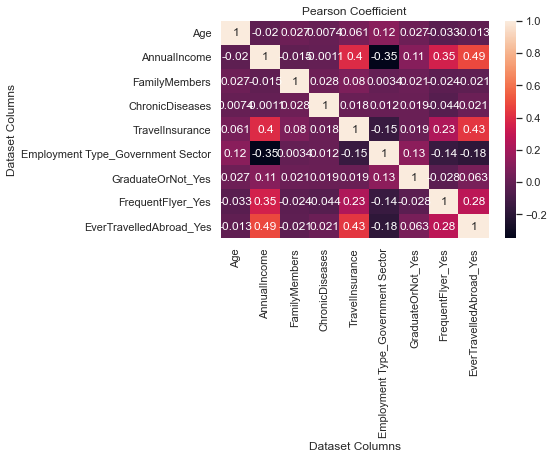

In [346]:
#Heatmap of Pearson Coefficient
sns.heatmap(Correlation_Pearson, annot=True)
plt.title('Pearson Coefficient')
plt.xlabel('Dataset Columns')
plt.ylabel('Dataset Columns')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

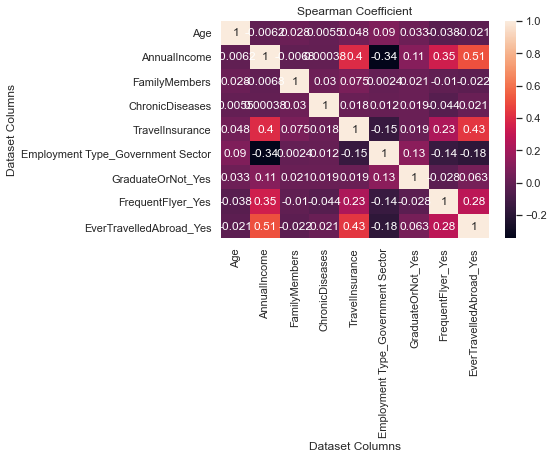

In [347]:
#Heatmap of Pearson Coefficient
sns.heatmap(Correlation_Spearman, annot=True)
plt.title('Spearman Coefficient')
plt.xlabel('Dataset Columns')
plt.ylabel('Dataset Columns')
plt.show

As mentioned above, there does not seem to be any significant correlations to 'TravelInsurance' from any of the features.

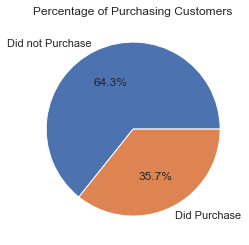

In [348]:
# Graph the Counts of Purchased Travel Insurance vs Not Purchased Travel Insurance
y_count = data_encoded['TravelInsurance'].value_counts().values
pie_labels = ['Did not Purchase', 'Did Purchase']
_=plt.pie(y_count, labels = pie_labels, autopct='%1.1f%%')
_=plt.title('Percentage of Purchasing Customers')
plt.show()

35.7% of the customers in the dataset had purchased insurance, while the other 64.3% had not. The model will be evaluated against these metrics later in the process.

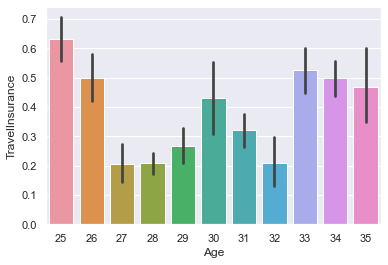

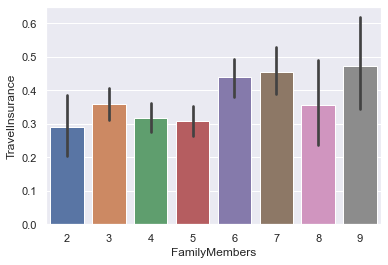

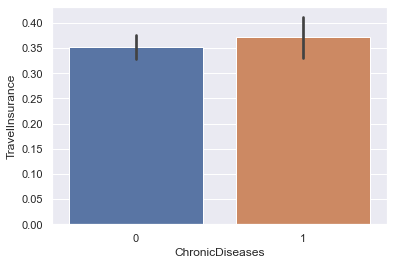

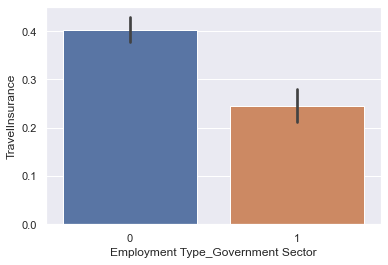

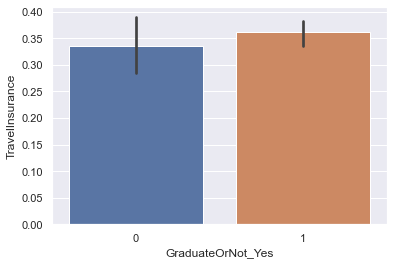

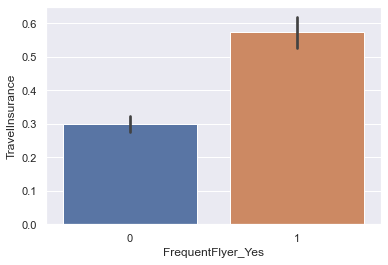

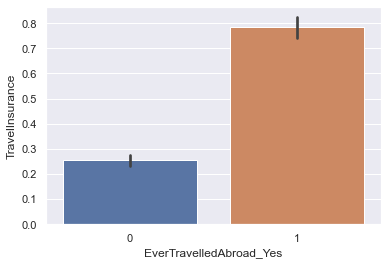

In [398]:
#Create Barplot comparing columns against TravelInsurance
for col in [x for x in data_encoded.columns if x not in 'AnnualIncome' and x not in 'TravelInsurance']:
    sns.barplot(x = col, y = 'TravelInsurance', data = data_encoded)
    plt.show()

As per initial observations. The age with the highest rate of purchasing travel insurance is the Age of 25. As per other features in the dataset:
    1. More of Private Sector purchased insurance compared to Government Sector
    2. Frequent Flyers had purchased Travel Insurance compared to non Frequent Flyers 
    3. People that travelled abroad before had purchased Travel Insurance more than individuals that had not been abroad before.

In [388]:
print(data_encoded['AnnualIncome'].min())
print(data_encoded['AnnualIncome'].max())

bins = np.arange(data_encoded['AnnualIncome'].min(),data_encoded['AnnualIncome'].max(), 250000)
print(bins)
data_encoded["Income_Bin"] = pd.cut(data_encoded['AnnualIncome'], bins = bins)#, include_lowest=True)

300000
1800000
[ 300000  550000  800000 1050000 1300000 1550000]


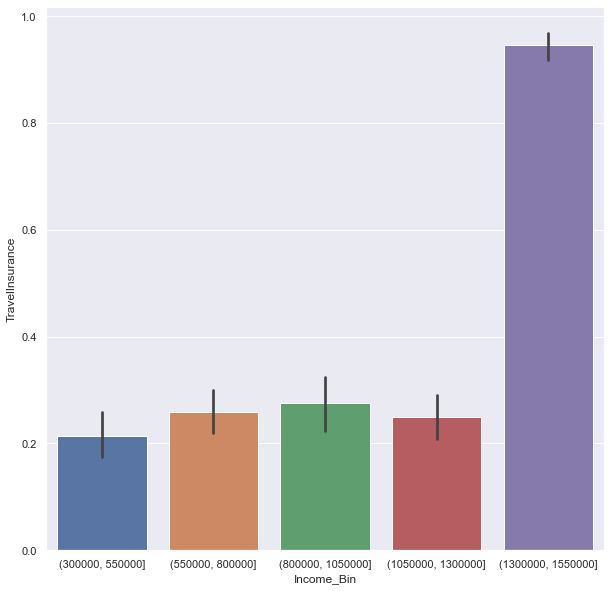

In [389]:
# Visualize Different Views of the Data 
figure = plt.figure(figsize = (10,10))
sns.barplot(x = "Income_Bin", y = 'TravelInsurance', data = data_encoded)
plt.show()

data_encoded.drop(columns =["Income_Bin"], inplace = True)

In [399]:
data_encoded.columns

Index(['Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases',
       'TravelInsurance', 'Employment Type_Government Sector',
       'GraduateOrNot_Yes', 'FrequentFlyer_Yes', 'EverTravelledAbroad_Yes'],
      dtype='object')

When grouping the annual income into bins, it shows a similar rate of purchasing travel insurance across the income groups. The largest age group, 1.3M  to 1.55M, has majority of the customers purchasing travel insurance

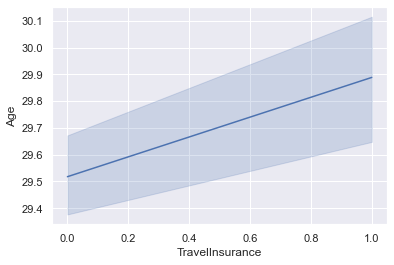

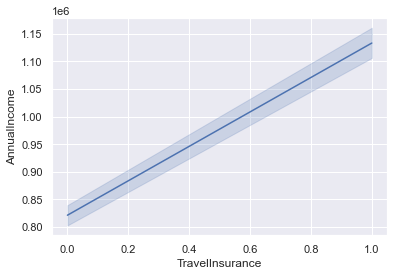

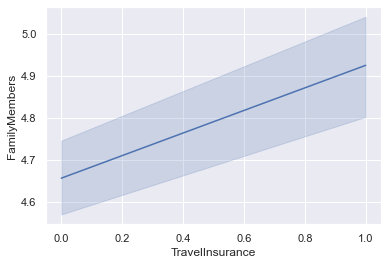

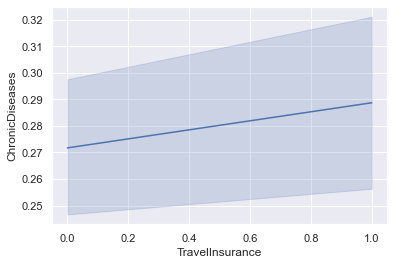

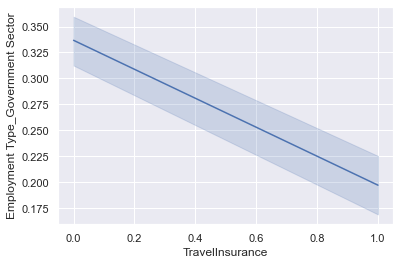

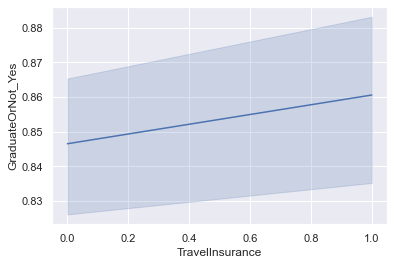

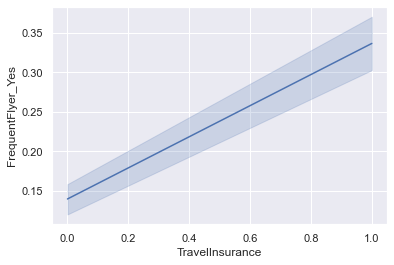

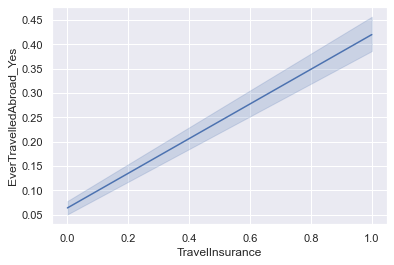

In [402]:
for col in [x for x in data_encoded.columns if 'TravelInsurance' not in x]:
    sns.lineplot(x='TravelInsurance', y=col, data = data_encoded)
    plt.show()

The line plots compare the change in rate of purchasing travel insurance compared as the feature value increases. For example, less of the government sector customers in the dataset purchased insurance compared to the private sector, so the direction of the line graph is negative.

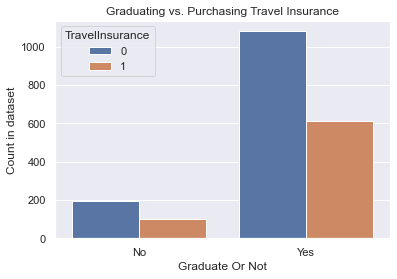

In [404]:
#Additional Graphs
plt.figure()
sns.countplot(x = 'GraduateOrNot_Yes', hue ='TravelInsurance', data=data_encoded)

plt.xlabel('Graduate Or Not')
plt.ylabel('Count in dataset')

plt.xticks([0,1],['No','Yes']) #Sets not graduated as no and Graduated as Yes 
plt.title('Graduating vs. Purchasing Travel Insurance')
plt.show()

The above graph shows the relationship been not graduating & purchasing insurance, as well as graduating & not purchasing insurance. The majority of the customers in the dataset graduated.

# Preprocess Data
Now that the data is summarized & understood, the data is ready to be preprocessed to be utilized in the predictive model

In [159]:
#Check for Null Data in each of the columns 
travel_data.isnull().sum() # No null values in the dataset - Imputing not required

TravelInsurance    0
dtype: int64

In [339]:
#Split Features of Dataset vs. Target Field
targetCol = ['TravelInsurance']
X = data_encoded.drop(columns = targetCol) #Convert to Numpy Array
X = X.values
y = data_encoded[targetCol].values.ravel() #Convert to Numpy Array

In [405]:
# Scaling of the Data
print("Mean pre-scaled:",X.mean(),'\n'+"Standard Devation pre-scaled:",X.std())
X_scaled = scale(data_encoded)
print('\n')
print("Mean scaled:",X_scaled.mean(),'\n'+"Standard Devation scaled:",X_scaled.std())

Mean pre-scaled: 116599.89745848012 
Standard Devation pre-scaled: 336011.75254271657


Mean scaled: -9.893482145292454e-17 
Standard Devation scaled: 1.0


In [406]:
#Split dataset to Training & Testing Data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 19)
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1589, 8)
Shape of y_train: (1589,)
Shape of X_test: (398, 8)
Shape of y_test: (398,)


# Predictive Model

In [497]:
#Initiate Linear Regression Model, RandomForestClassifierModel, DecisionTreeClassifierModel, and KNeighborsClassifierModel

reg_model = LogisticRegression(solver = 'liblinear', random_state=19) #liblinear has been chosen as the solver for smaller sizes datasets to penalize L1
rndmfor_model = RandomForestClassifier(criterion = 'entropy', random_state=19) #Entropy is used to measure the quality of the split & this criterion is conducive to information gain
dec_model = DecisionTreeClassifier(criterion = 'entropy', random_state=19) #Entropy is used to measure the quality of the split & this criterion is conducive to information gain
knn_model = KNeighborsClassifier(n_neighbors = 5)

for model in [reg_model,rndmfor_model,dec_model,kn_model]:
    #Train model & predict
    model.fit(X_train, y_train)
    pred_y = model.predict(X_test)

    #Score of Accuracy 
    accuracy = model.score(X_test, y_test)
    best_accuracy = 0
    print("{model}:".format(model=model),model.score(X_test, y_test))
    if accuracy>best_accuracy:
        best_accuracy = accuracy
        best_model = model
print("Best Model is:",best_model, "with Accuracy:",best_accuracy)
best_model.fit(X_train, y_train)
pred_y = best_model.predict(X_test)    

LogisticRegression(random_state=19, solver='liblinear'): 0.6959798994974874
RandomForestClassifier(criterion='entropy', random_state=19): 0.7889447236180904
DecisionTreeClassifier(criterion='entropy', random_state=19): 0.7663316582914573
KNeighborsClassifier(n_neighbors=10): 0.8266331658291457
Best Model is: KNeighborsClassifier(n_neighbors=10) with Accuracy: 0.8266331658291457


Out of the 4 models, given the configured parameters, the KNeighborsClassifier has the highest accuracy at 82.6%. This will be used as the model for prediction.

In [498]:
#Initial Metrics of Model
print(confusion_matrix(y_test,pred_y))
print(classification_report(y_test,pred_y))

[[261  13]
 [ 56  68]]
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       274
           1       0.84      0.55      0.66       124

    accuracy                           0.83       398
   macro avg       0.83      0.75      0.77       398
weighted avg       0.83      0.83      0.81       398



In the confusion matrix, the true positive is 261, false negative is 13, true positive is 56, and True negative is 68. Meaning, there were 261 predicted correctly to not purchase insurance and 68 predicted correctly to purchase insurance. 

The precision of the KNeighbors Classification model is 83%, which means 83% records in the model predicted not  purchasing insurance correctly compared to the population predictive, correctly and incorrectly as not purchasing insurance. Essentially, 83% of the test population identified to not purchase, did in fact not purchase. The Recall averages 83% as well, referring to the amount of predictions that may have been missed in the model. This is also high, so there were not many predictions missed for predicting who will not purchase travel insurance.

# Model Evaluation

In [505]:
#Evaluate Model with Cross Validation Score, running through various split types
cv = 5
cv_score = cross_val_score(reg_model,X_train, y_train, cv = cv)
print('5 Scores:',cv_score)
print('Mean:',np.mean(cv_score))

5 Scores: [0.75471698 0.72327044 0.65408805 0.74842767 0.71293375]
Mean: 0.7186873797194611


Cross Validation validates across 5 different folds of training data & returns the R-squared. The average across the 5 folds is 0.71

In [500]:
#Calculate ROC
y_pred_prob = best_model.predict_proba(X_test)[:,1] #Stores array with probability of predictive labels as 1
fpr,tpr,thresholds = roc_curve(y_test, y_pred_prob)

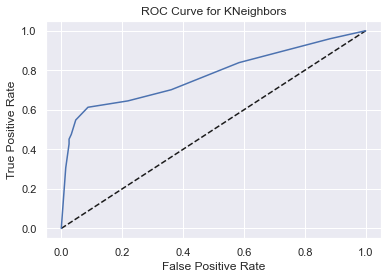

In [501]:
#Plot ROC
plt.plot([0,1], [0,1], 'k--')#k-- is used for styling
plt.plot(fpr,tpr,label= 'KNeighbors Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNeighbors')
plt.show()

In [502]:
# Calculate AUC score
AUC = roc_auc_score(y_test,y_pred_prob)
print('AUC Score',AUC) 

AUC Score 0.7739139392512363


# Hyperparameter Tuning

In [503]:
#Testing n_neighbors hyperparameter from 1-50 
parameter_grid = {'n_neighbors':np.arange(1,50)}
knn_model = KNeighborsClassifier()
knn_cv = GridSearchCV(knn_model,parameter_grid,cv=5)
knn_cv.fit(X,y)
print("Best performing parameters:",knn_cv.best_params_)

Best performing parameters: {'n_neighbors': 11}


The original model when configured only utilized one parameter, n_neighbors. This was set to 5 to start. 

In [504]:
#Test out model with tuned parameter
knn_model_tuned = KNeighborsClassifier(n_neighbors = 11)

knn_model_tuned.fit(X_train, y_train)
pred_y = knn_model_tuned.predict(X_test)
model.score(X_test, y_test)

0.8266331658291457

As the number of neighbors in the original model had been set to 10, the hyperparameter tuning did not change the accuracy, with materiality, of the model by changing the number of neighbors to 11. The accuracy remains at around 82.6%

# Conclusion

Overall the model stands at ~83% accuracy to predict if a customer would purchase travel insurance or nor, with comparing across 4 different models, preprocessing such as scaling, and attempts at hyperparameter tuning. The KNN model is the most accurate model out of the datasets, with a configuration of 11 neighbors. Additional possibiliies to optimize this includes feature engineering across the existing features, testing out additional machine learning models, and including additional parameters in the KNN model.